In [1]:
def fd(s): # замена цен на разницу цен
    for i in range(np.size(s)-1):
        s[i] = s[i+1]/s[i] - 1

def profitability_and_risk(s): # поиск среднего риска и средней доходности 
    fd(s)
    s = s[:11]
    smean = np.mean(s)
    average_income.append(smean)
    sstd = np.std(s)
    average_risk.append(sstd)

def total_revenue_function(p, sd): # поиск общей доходности 
    od = 0
    for i in range(np.size(p)):
        od +=  p[i]*sd[i]
    return od

from math import sqrt
import numpy as np
from scipy.optimize import minimize

# получение котировок из файла 
securities1 = np.genfromtxt('visa.txt', delimiter=' ', names=True)
securities2 = np.genfromtxt('macys.txt', delimiter=' ', names=True)
securities3 = np.genfromtxt('apple.txt', delimiter=' ', names=True)

# начальные доли акций 
proportion1 = 0.25 
proportion2 = 0.25 
proportion3 = 0.5
proportion = np.array([proportion1, proportion2, proportion3])

# средняя доходность и средний риск
average_income = []
average_risk = []

# избавление от лишних столбцов
securities1 = securities1['CLOSE']
securities2 = securities2['CLOSE']
securities3 = securities3['CLOSE']

# преобразование основного массива к нужному виду 
tmp = np.array([securities1, securities2, securities3])
for i in range(len(tmp)):
    profitability_and_risk(tmp[i])
for i in range(3):
    tmp[i] = tmp[i][:11]
    
array = np.zeros((3,11))
for i in range(3):
    array[i] = tmp[i][:11]

# роиск ковариационной матрицы
cov = np.cov(array)

# поиск общего риска портфеля
total_risk = np.matmul(proportion, cov)
total_risk = sqrt(np.matmul(total_risk, proportion))

# поиск общей доходности портфеля
total_revenue = total_revenue_function(proportion, average_income)

In [2]:
# Вывод данных о портфеле
print("Ковариационная матрица ", '\n', cov)
print('\n')
for i in range(3):
    print("Доходность акции ", i+1, ":", "%.2f" % (average_income[i]*100), "%")
print('\n')
for i in range(3):
    print("Риск акции ", i+1, ":", "%.2f" % (average_risk[i]*100), "%")
print('\n')
print("Общяя доходность портфеля ", "%.2f" % (total_revenue*100), "%")
print("Общий риск портфеля ", "%.2f" % (total_risk*100), "%")

Ковариационная матрица  
 [[ 0.00111939 -0.00093815  0.00038052]
 [-0.00093815  0.01294495 -0.00145022]
 [ 0.00038052 -0.00145022  0.00426609]]


Доходность акции  1 : 3.11 %
Доходность акции  2 : 4.34 %
Доходность акции  3 : 2.58 %


Риск акции  1 : 3.19 %
Риск акции  2 : 10.85 %
Риск акции  3 : 6.23 %


Общяя доходность портфеля  3.15 %
Общий риск портфеля  3.95 %


In [3]:
# Минимизация риска при заданной доходности в 2.59%
def objective(x): # функция риска
    y = np.matmul(x, cov)
    return sqrt(np.matmul(y, proportion))
         
            
            
def constraint1(x): # ограничение на сумму долей
    return x[0]+x[1]+x[2]-1.0
def constraint2(x): # задание конкретной доходности
    tmp = 0
    for i in range(3):
        tmp += average_income[i]*x[i] 
    return tmp - 0.0259
    
x0=[proportion1,proportion2,proportion3]# изначальные доли акций

b=(0.0,1.0) # диапозон X
bnds=(b,b,b)

con1={'type':'eq','fun': constraint1}
con2={'type':'eq','fun': constraint2}
cons=[con1,con2]

sol=minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)
for i in range(3):
    print("Доля акции ", i+1, ":", "%.2f" % (sol.x[i]*100), "%")
print('\n')

Доля акции  1 : 1.17 %
Доля акции  2 : 0.00 %
Доля акции  3 : 98.83 %




In [4]:
def optimumD(d):
    def objective(x): # функция риска
        y = np.matmul(x, cov)
        return sqrt(np.matmul(y, proportion))
         
            
            
    def constraint1(x): # ограничение на сумму долей
         return x[0]+x[1]+x[2]-1.0
    def constraint2(x): # задание конкретной доходности       
        tmp = 0
        for i in range(3):
            tmp += average_income[i]*x[i] 
        return tmp - d
    
    x0=[proportion1,proportion2,proportion3]# изначальные доли акций

    b=(0.0,1.0) # диапозон X
    bnds=(b,b,b)

    con1={'type':'eq','fun': constraint1}
    con2={'type':'eq','fun': constraint2}
    cons=[con1,con2]

    sol=minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)

    e = sol.fun*100
    return e

In [5]:
def optimumR(r):
    
    def objective(x): # функция доходности
        tmp = 0
        for i in range(3):
            tmp += average_income[i]*x[i] 
        return -tmp
            
    def constraint1(x): # ограничение на сумму долей
         return x[0]+x[1]+x[2]-1.0

    def constraint2(x): # задание конкретного риска       
        y = np.matmul(x, cov)
        return sqrt(np.matmul(y, proportion)) - r
    
    x0=[proportion1,proportion2,proportion3]# изначальные доли акций

    b=(0.0,1.0) # диапозон X
    bnds=(b,b,b)

    con1={'type':'eq','fun': constraint1}
    con2={'type':'eq','fun': constraint2}
    cons=[con1,con2]

    sol=minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)
    e = sol.fun*(-100)
    return e

In [6]:
oR =[] # передаю уже готовый массив заданного риска в plt.plot, так как при передаче функции возникает ошибка
for i in range(154, 478, 1):
    oR.append(optimumR(i/10000))

In [7]:
oD =[] # передаю уже готовый массив заданной дохлдности в plt.plot, так как при передаче функции возникает ошибка
for i in range(259, 435, 1):
    oD.append(optimumD(i/10000))

Задать тестовую точку
Доходность в %: 3
Риск в %: 3


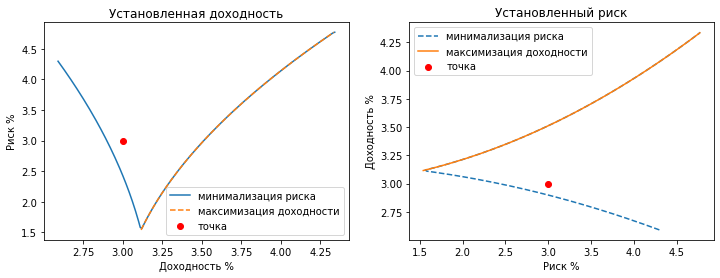

In [8]:
import matplotlib.pyplot as plt

# создаём область, в которой будет отображаться график
x1 = np.linspace(2.59, 4.34, 176)
x2 = np.linspace(1.54, 4.77, 324)

x = 3.0
y = 3.0
print("Задать тестовую точку")
x = float(input("Доходность в %: "))
y = float(input("Риск в %: "))

# рисуем график 1
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x1, oD)
plt.plot(oR, x2, '--')
plt.scatter(x, y, c='r')
plt.legend(['минимализация риска', 'максимизация доходности', 'точка'])
plt.title('Установленная доходность')
plt.xlabel('Доходность %')
plt.ylabel('Риск %')

# рисуем график 2
plt.subplot(1, 2, 2)
plt.plot(oD, x1, '--')
plt.plot(x2, oR)
plt.scatter(y, x, c='r')
plt.legend(['минимализация риска', 'максимизация доходности', 'точка'])
plt.title('Установленный риск')
plt.xlabel('Риск %')
plt.ylabel('Доходность %')

# показываем график
plt.show()